In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
data.shape

(2290, 6)

In [9]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


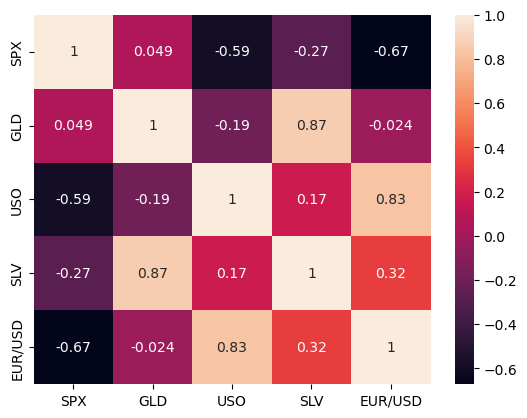

In [14]:
correlation = sns.heatmap(data.corr(), annot = True)

In [16]:
X = data.drop(columns = ['Date', 'GLD'], axis = 1)
Y = data['GLD']

In [17]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [18]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators = 100)

In [22]:
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

In [23]:
## Model evaulation

pred = regressor.predict(xtest)

In [24]:
pred

array([168.25619908,  82.01599996, 115.80239988, 127.78340068,
       120.87460165, 154.53559797, 150.27959803, 126.07500089,
       117.51279872, 125.91140091, 116.67850102, 171.92180084,
       141.56959861, 167.74689893, 115.22869968, 117.76470018,
       138.70400316, 169.67300046, 160.29450369, 156.74179933,
       155.10839959, 125.26800029, 176.48260052, 156.46050343,
       125.25350027,  93.72669981,  77.97810003, 120.64990008,
       119.04879898, 167.52310088,  88.22950088, 125.36410042,
        91.09970068, 117.61660042, 121.0853993 , 136.17600133,
       115.48340151, 114.77780112, 148.44299958, 107.26650117,
       104.16980217,  87.30959811, 126.49440068, 118.15209976,
       153.05869889, 119.66079999, 108.29969972, 108.28109809,
        93.30050048, 127.13509782,  74.97960049, 113.66209957,
       121.0764001 , 111.13129878, 118.84629878, 121.26409923,
       159.87370048, 165.8662016 , 147.09859693,  85.81329846,
        94.55380047,  86.82139853,  90.53340066, 119.04

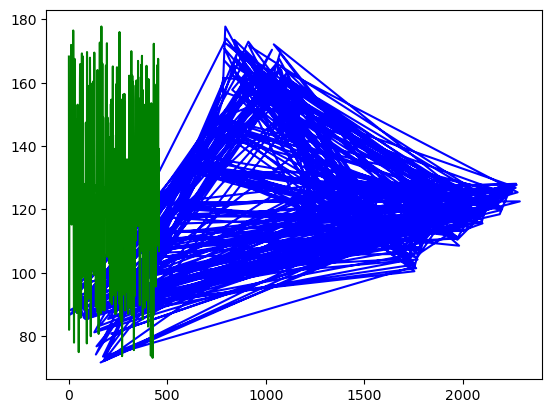

In [27]:
plt.plot(ytest, color = 'blue', label='Actual value')
plt.plot(pred, color = 'green', label='Predicted value')
plt.show()